In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1LM7pa_8nJvphLwN4YC2R8ToYVRHWVwksDtHmeZUUaKU/edit#gid=1538167520')
sheet = wb.worksheet('weatherhistory')
data = sheet.get_all_values()
from google.colab import files
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]

In [ ]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
1,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222222,7.388888889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
2,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355555556,7.227777778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
3,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377777778,9.377777778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
4,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288888889,5.944444444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
5,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755555556,6.977777778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


# **Cleaning and Processing the Dataset**

In [ ]:
df['Temperature (C)'] = df['Temperature (C)'].astype('float')
df['Apparent Temperature (C)'] = df['Apparent Temperature (C)'].astype('float')
df['Humidity'] = df['Humidity'].astype('float')
df['Wind Speed (km/h)'] = df['Wind Speed (km/h)'].astype('float')
df['Wind Bearing (degrees)'] = df['Wind Bearing (degrees)'].astype('int')
df['Visibility (km)'] = df['Visibility (km)'].astype('float')
df['Loud Cover'] = df['Loud Cover'].astype('int')
df['Pressure (millibars)'] = df['Pressure (millibars)'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 1 to 96453
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               96453 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


In [ ]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
df['Precip Type'].fillna( df['Precip Type'].value_counts().index[0], inplace= True )

In [ ]:
df.isnull().sum()

0
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

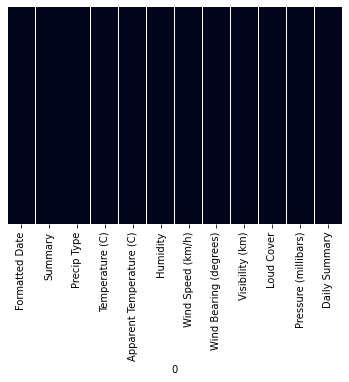

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

# **Exploratory Data Analysis**

In [ ]:
df.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
1,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
2,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
3,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.


In [ ]:
import datetime as dt
from datetime import timedelta

In [ ]:
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"])

In [ ]:
"""
data_columns = ['Formatted Date','Temperature (C)','Humidity']
df_monthly_mean = df[data_columns].resample('MS').mean()
sns.lineplot(data = df_monthly_mean) """

In [ ]:
precip = df['Precip Type'].value_counts().reset_index()
precip.columns=['precip type', 'count']
precip

,precip type,count
0,rain,85224
1,snow,10712
2,null,517


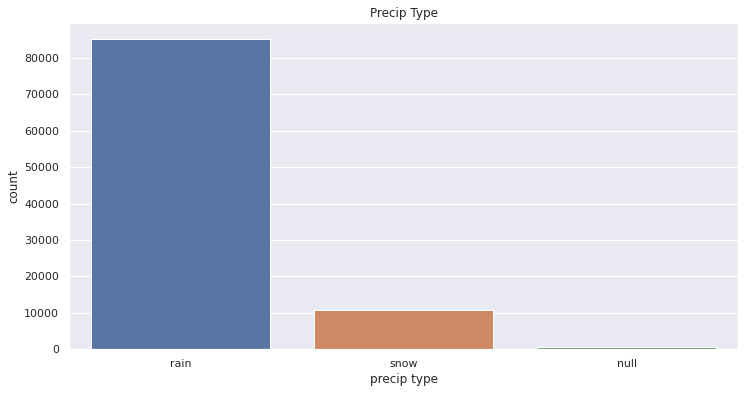

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Precip Type')
sns.barplot(x=precip['precip type'],y=precip['count'])

In [ ]:
Weather= df['Summary'].value_counts().reset_index()
Weather.columns=['Weather','Count']
Weather

,Weather,Count
0,Partly Cloudy,31733
1,Mostly Cloudy,28094
2,Overcast,16597
3,Clear,10890
4,Foggy,7148
5,Breezy and Overcast,528
6,Breezy and Mostly Cloudy,516
7,Breezy and Partly Cloudy,386
8,Dry and Partly Cloudy,86
9,Windy and Partly Cloudy,67


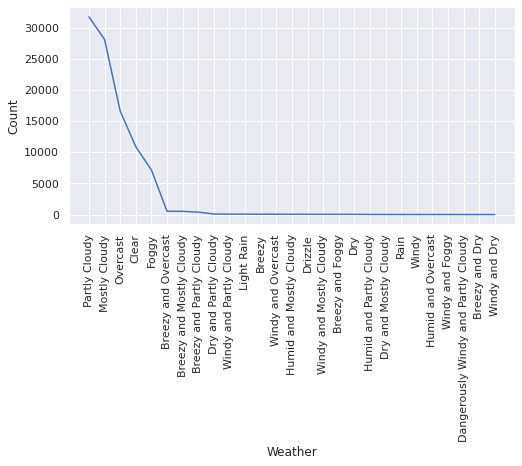

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
plt.xticks(rotation=90)
sns.lineplot(x=Weather['Weather'], y=Weather['Count'],data=Weather )
plt.show()

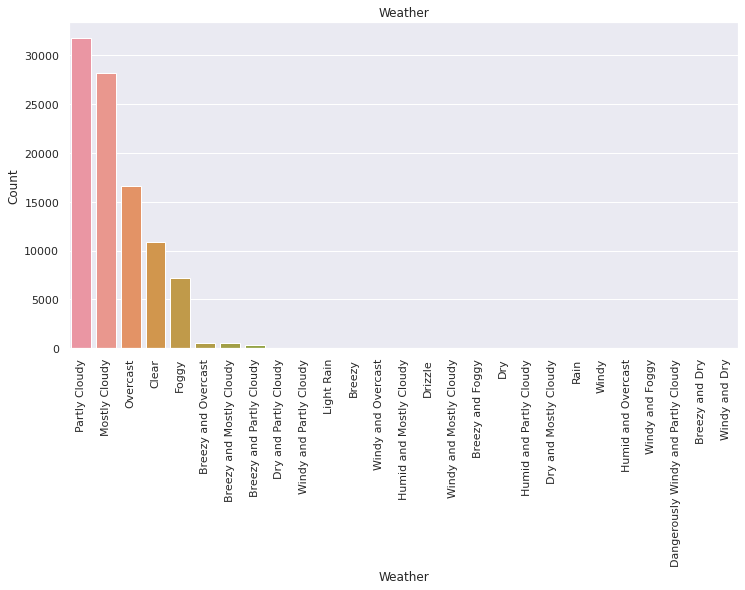

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Weather')
sns.barplot(x=Weather['Weather'], y=Weather['Count'])

Text(0, 0.5, 'Humidity')

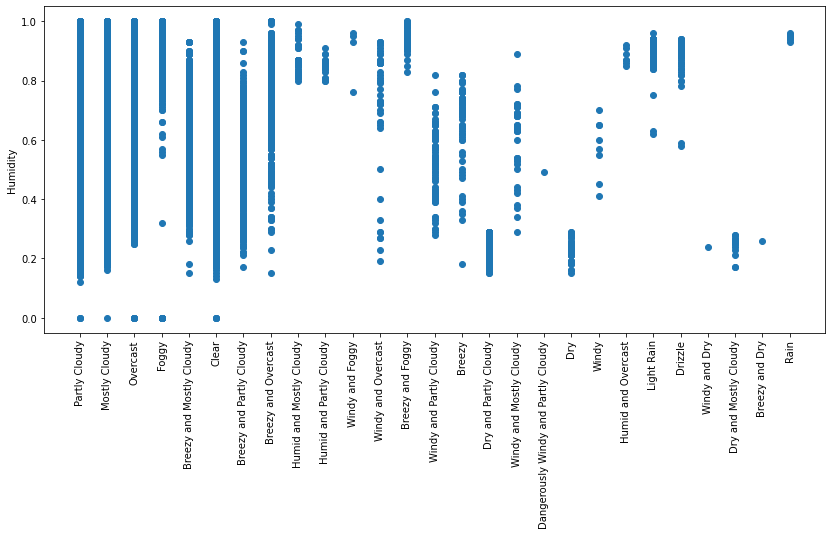

In [ ]:
plt.figure(figsize=(14,6))
plt.scatter(df['Summary'],df['Humidity'])
plt.xticks(rotation = 90)
plt.ylabel('Humidity')

Text(0, 0.5, 'Temperature (C)')

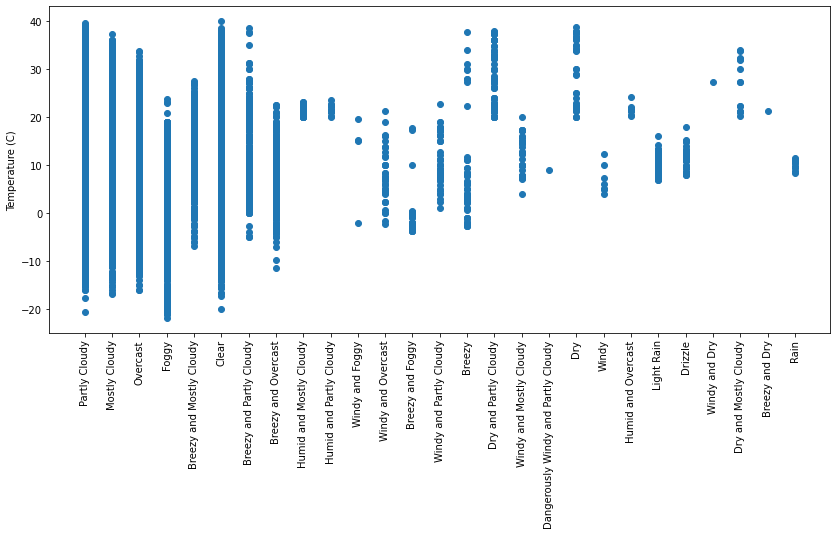

In [ ]:
plt.figure(figsize=(14,6))
plt.scatter(df['Summary'],df['Temperature (C)'])
plt.xticks(rotation = 90)
plt.ylabel('Temperature (C)')

Text(0, 0.5, 'Wind Bearing (degrees)')

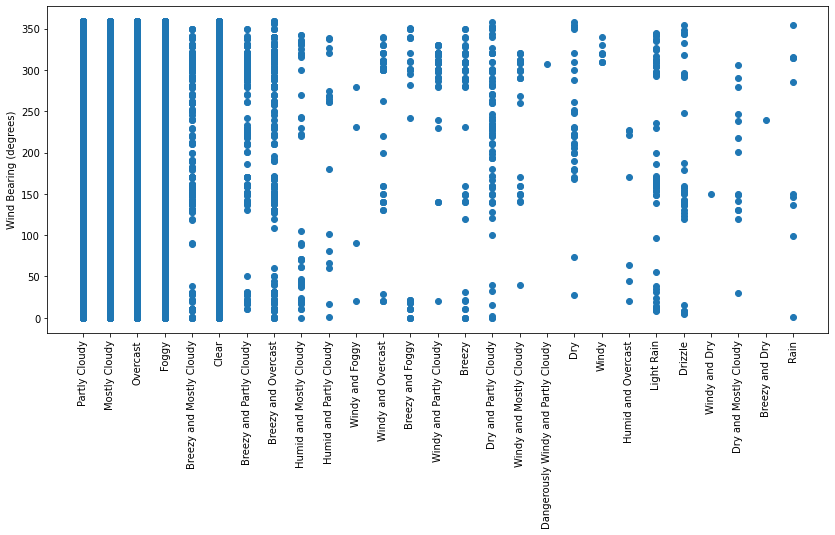

In [ ]:
plt.figure(figsize=(14,6))
plt.scatter(df['Summary'],df['Wind Bearing (degrees)'])
plt.xticks(rotation = 90)
plt.ylabel('Wind Bearing (degrees)')	

Text(0, 0.5, 'Wind Speed (km/h)')

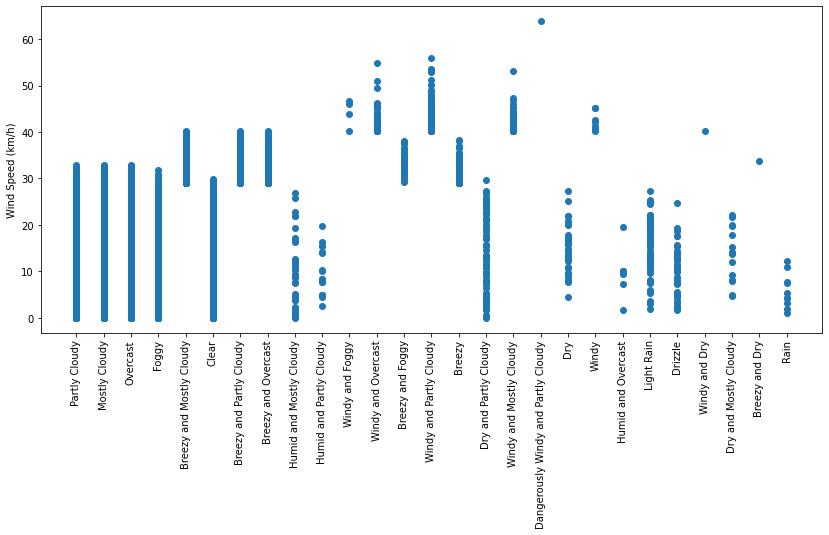

In [ ]:
plt.figure(figsize=(14,6))
plt.scatter(df['Summary'],df['Wind Speed (km/h)'])
plt.xticks(rotation = 90)
plt.ylabel('Wind Speed (km/h)')

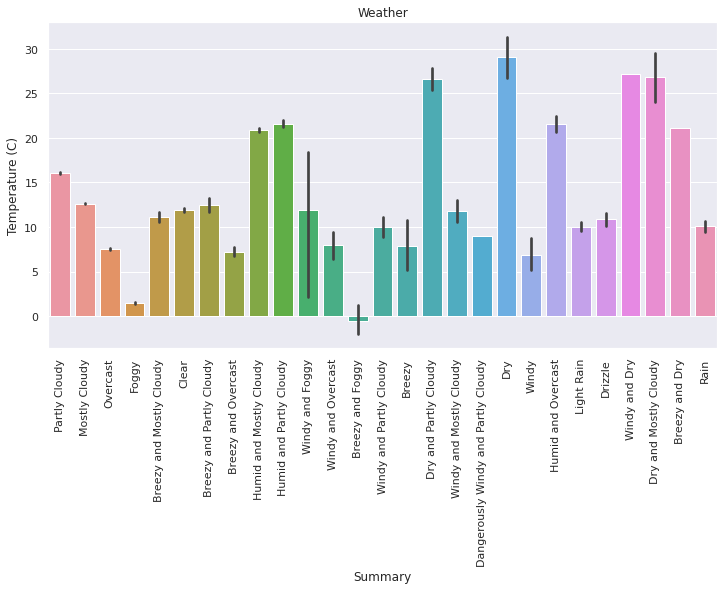

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Weather')
sns.barplot(x= df['Summary'],y=df['Temperature (C)'])

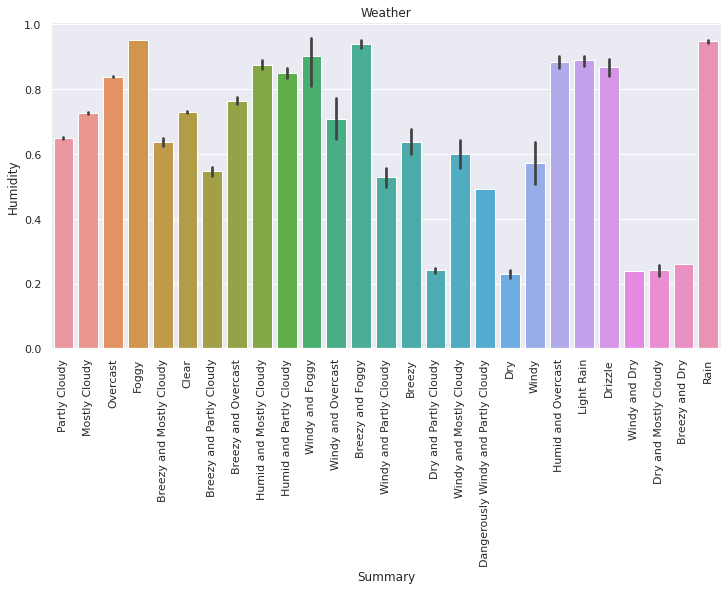

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Weather')
sns.barplot(x= df['Summary'],y=df['Humidity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


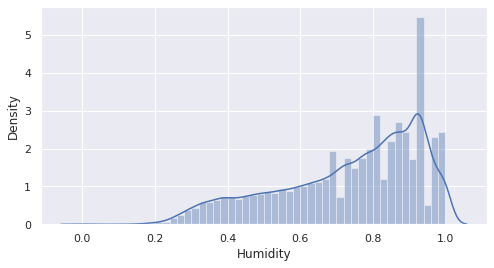

In [ ]:
sns.distplot(df['Humidity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


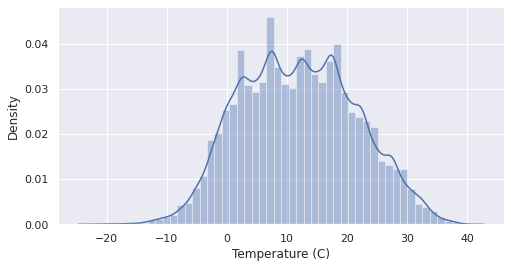

In [ ]:
sns.distplot(df['Temperature (C)'])

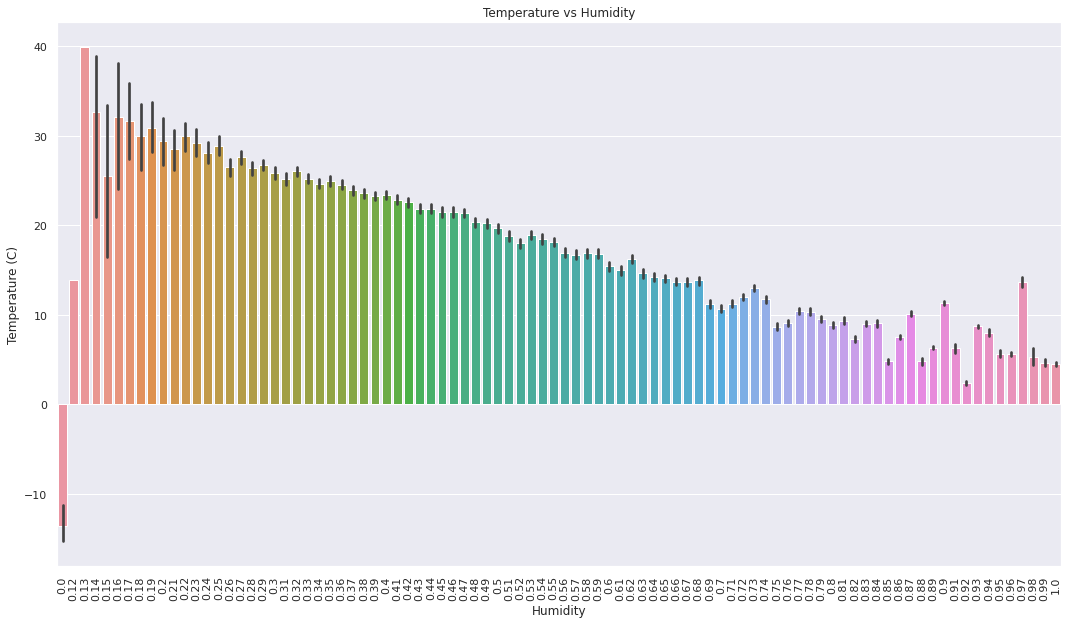

In [ ]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=90)
plt.title('Temperature vs Humidity')
sns.barplot(y=df['Temperature (C)'], x=df['Humidity'])

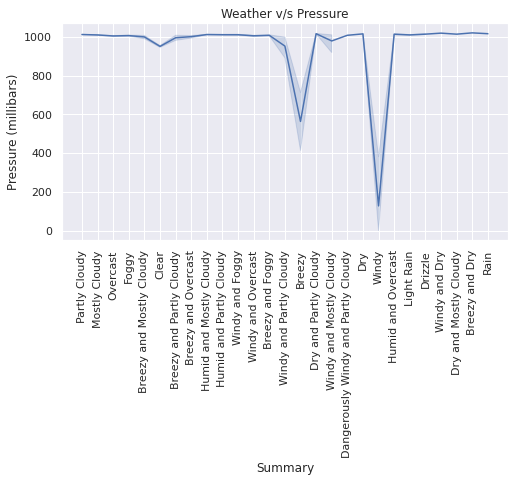

In [ ]:
plt.figure(figsize=(8,4))
plt.xticks(rotation=90)
plt.title('Weather v/s Pressure')
sns.lineplot(y=df['Pressure (millibars)'], x=df['Summary'])

## **Dashboards**

In [ ]:
pip install pywedge

In [ ]:
import pywedge as pw

In [ ]:
x = pw.Pywedge_Charts(df, c=None, y="Humidity")

In [ ]:
charts = x.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')